# Радиосистемы контроля и управления (РСКУ)

In [198]:
from math import atan2, degrees, radians, tan
import matplotlib.pyplot as plt

## Моделирование метода прямого наведения с постоянным углом упреждения

In [199]:
class Object:
    def __init__(self, initialX, initialY):
        self.x = initialX
        self.y = initialY
    def getCoordinate(self):
        return list(zip(self.x, self.y))
    def currentPosition(self):
        return [self.x[-1], self.y[-1]]
    def currentDirection(self):
        dX = self.x[-1] - self.x[-2]
        dY = self.y[-1] - self.y[-2]
        return atan2(dY, dX)
    def moveTo(self, newX, newY):
        self.x.append(newX)
        self.y.append(newY)

In [200]:
step = int(10)
target = Object(initialX=[step - i for i in range(step)],
                initialY=[30 for i in range(step)])

# target = Object(initialX=[10, 9],
#                 initialY=[30, 30])

In [201]:
def directWithConstLeadAngle(vartheta, epsilon ,phi_0):
    return vartheta - epsilon - phi_0

def linearTargetMovement(Xpos, Ypos, step):
    newX = Xpos - step
    newY = Ypos
    return newX, newY


In [202]:
controlObject = Object(initialX=[0,0], initialY=[0,1])

# for i in range(10):
for targetPosition in target.getCoordinate():
    # targetPosition = target.getCoordinate()[-1]
    print(targetPosition)
    step = 1
    
    dX = targetPosition[0] - controlObject.currentPosition()[0]
    dY = targetPosition[1] - controlObject.currentPosition()[1]
    
    epsilon = atan2(dY, dX)
    vartheta  = controlObject.currentDirection()
    
    delta = directWithConstLeadAngle(vartheta, epsilon, radians(30))

    print(f"---------------------------")
    print(f"epsilon: {degrees(epsilon)}")
    print(f"vartheta: {degrees(vartheta)}")
    print(f"delta: {degrees(delta)}")
    print(f"vartheta + delta: {degrees(vartheta + delta)}")
    print(f"---------------------------")


    newPositionX = step + controlObject.currentPosition()[0]
    newPositionY = tan(vartheta + delta)*step + controlObject.currentPosition()[1]

    controlObject.moveTo(newPositionX, newPositionY)
    
    presition = 1
    if (abs(dX) < presition) and (abs(dY) < presition):
        print("!BAXXX")
        break
    

    newTargetX, newTargetY = linearTargetMovement(targetPosition[0], targetPosition[1], 1)
    target.moveTo(newTargetX, newTargetY)



(10, 30)
---------------------------
epsilon: 70.97439396243132
vartheta: 90.0
delta: -10.97439396243132
vartheta + delta: 79.02560603756869
---------------------------
(9, 30)
---------------------------
epsilon: 71.4520458283839
vartheta: 79.02560603756869
delta: -22.426439790815216
vartheta + delta: 56.59916624675347
---------------------------
(8, 30)
---------------------------
epsilon: 74.9578615830309
vartheta: 56.59916624675347
delta: -48.358695336277435
vartheta + delta: 8.240470910476033
---------------------------
(7, 30)
---------------------------
epsilon: 79.77781766155451
vartheta: 8.240470910476047
delta: -101.53734675107846
vartheta + delta: -93.29687584060241
---------------------------
(6, 30)
---------------------------
epsilon: 67.4736873984354
vartheta: 86.7031241593976
delta: -10.770563239037791
vartheta + delta: 75.9325609203598
---------------------------
(5, 30)
---------------------------
epsilon: 90.0
vartheta: 75.9325609203598
delta: -44.06743907964019
vart

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


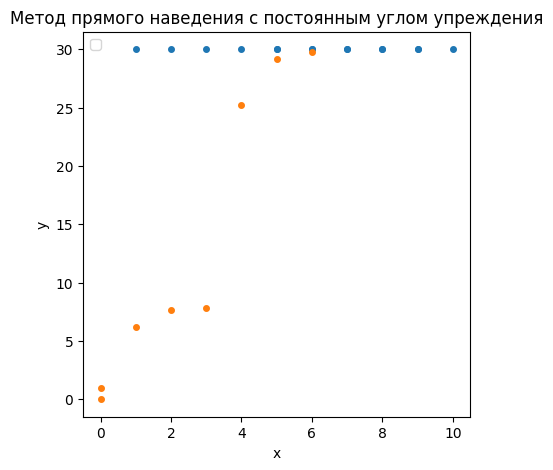

In [203]:
fig, ax = plt.subplots(1,1)

plt.scatter(target.x, target.y, linewidth=2.0, marker=".")
plt.scatter(controlObject.x, controlObject.y, linewidth=2.0, marker=".")

plt.title("Метод прямого наведения с постоянным углом упреждения")
plt.xlabel("x")
plt.ylabel("y")
# plt.xlim(0,1e2)


fig.set_size_inches(5, 5)
plt.legend()
plt.show()


In [204]:
degrees(atan2(29,10))

70.97439396243132